# Homework 2

<h3>Introduction</h3>

<p>In this homework, you will be given three questions to answer.</p>

<strong>How to submit:</strong> You can submit your code using the blue <strong>Submit</strong> button above. This button will record your code below. Please make sure you submit your code when you are done.

<p><strong>Caution:</strong> Please <em>do not</em> change the names of any provided functions or classes within the code. Furthermore, <em>any code not surrounded by <strong>#&lt;GRADED&gt;</strong><strong>#&lt;/GRADED&gt;</strong> tags will not be graded</em>. Please <em>do not</em> add or remove such tags. 


# Question 1: Kernel PCA

In class we looked at how we can use kernel PCA to project points in $d$ dimensional space to $K$ dimensions using a non-linear mapping. One of the nice things about linear PCA was that if we are given a new test point in $d$ dimensions, we can project this new point into the same $K$ dimensional space as the original set of $n$ points. Specifically, given a new test point $x \in \mathbb{R}^d$ we can get its $K$ dimensional projection $y \in \mathbb{R}^K$ as follows:
$$
y = W (x - \mu)
$$
where $W$ is the PCA projection matrix, and $\mu$ is the mean of the $n$ samples we use to find the PCA projection matrix, that is, $\mu = \frac{1}{n} \sum_{t=1}^n x_t$. 

It turns out that we can do such an out of sample projection for kernel PCA as well. This is what you will work out in this question. Your goal in this question is to find the $K$ dimensional representation of a new datapoint using kernel PCA. 

Note: While once can do such out of sample projection using kernel PCA, for methods like tSNE and ISOMAP, we dont really have a clean way to project new point into the same low dimensional space as the original $n$ points. We instead have to recompute. Thus while tSNE is great for visualization, its not useful as a dimensionality reduction method beyond its visualization capabilities.

# For this problem, we will use $K=2$, that is project points to $2$ dimensions

In [1]:
# Import all goodies
import numpy as np
import scipy
from scipy.sparse.linalg import eigs
from scipy.ndimage import imread
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from PIL import Image
from IPython.display import display
init_notebook_mode(connected=True)
import sys
import csv
import numpy
import pandas as pd


from __future__ import print_function

from scipy.sparse import linalg

import matplotlib.cm as cm

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

sys.path.insert(0, './p02')

In [2]:
# Here we deine the kernel PCA function.
# This function returns Y the 2 dimensional projection using kernel PCA 
# and also the eigen values of the centered kernel matrix

def KPCA(Kern,K):
    n = Kern.shape[0]
    O = np.ones((n,n))
    Ktilde  = Kern - O.dot(Kern)/n - Kern.dot(O)/n + O.dot(Kern.dot(O))/(n*n)
    Gamma,P = eigs(Ktilde,K)
    Y = np.zeros((n,K))
    for j in range(K):
        Y[:,j] = P[:,j]*np.sqrt(n*Gamma[j])

    return Y, Gamma

In [3]:
# Below we define the the rbd kernel matrix computation with prefixed parameters. 
# It takes two arguments X and Y where X is an n x d matrix of n data points 
# and Y an mxd matrix of m data points and returns an n x m matrix 
# where i , jth entry of the matrix is the kernel function computed between 
# ith row of matrix X and jth row of matrix Y. kernel(X,X) will return the 
# kernel martrix for the data X.


def kernel(X,Y):
    par = 18000000;
    X = np.asmatrix(X)
    Y = np.asmatrix(Y)
    n = X.shape[0]
    m = Y.shape[0]
    K = np.zeros((n,m))
    for t in range(n):
        for s in range(m):
            a = X[t,:];
            b = Y[s,:];
            K[t,s] = np.exp(- np.linalg.norm(a.T - b.T)*np.linalg.norm(a.T - b.T)/par);
    return K

# The two steps:
There are two steps you need to take to complete this problem. Recall, that in class when we derived kernel PCA, we first assumed points were centered and derived the kernel PCA algorithm with this assumption. Next, we computed a centered version of kernel matrix based on the original kernel matrix. We will follow these steps here: 

1. First, you will write function Q1_1_solution(x,X,Kern) that takes in three arguments. First, the argument $x$, a $1 \times d$ matrix containing the new $d$ dimensional test point. Next the data matrix $X$ of size $n \times d$ based on which initial kernel PCA is performed. and finally the matrix $\mathrm{Kern}$ consisting of $n \times n$ (non-centered) kernel matrix of the data $X$. Your function should return a $1 \times n$ matrix $\mathrm{Kcenter}$. The $i$'th entry of this matrix should be the "centralized" kernel evaluation of the new test point $x$ against each of the $n$ points in the original set of data points. That is specifically, the $i$'th entry of $\mathrm{Kcenter}$ should evaluate to 
$$
\mathrm{Kcenter}[1,i] = \left(\Phi(x) - \frac{1}{n} \sum_{t=1}^n \Phi(x_t)\right)^\top \left(\Phi(x_i) - \frac{1}{n} \sum_{t=1}^n \Phi(x_t)\right)
$$
where $x_1,\ldots,x_n$ are the original $n$ points, $\Phi$ is the feature mapo that maps the data points into some large, possibly infinite dimensional space.

2. The second step is to use the matrix $\mathrm{Kcenter}$, along with $Y$, the $n \times 2$ the two dimensional projection of points in $X$ using kernel PCA and $\textrm{Gamma}$ has the two eigen values of the top two directions computed in kernel PCA performed on $X$


In [4]:
# Your code goes below, see step 1 above for instructions as two what your function should do.
#<GRADED>

def Q1_1_solution(x,X,Kern):
    n = Kern.shape[0]
    O = np.ones((n,n))
    I= np.ones((1,n))
    Kcenter = np.zeros((1,n))
    Kcenter=kernel(x,X)-np.dot(I,Kern)/n-np.dot(kernel(x,X),O)/n+I.dot(Kern.dot(O))/(n*n)
    return Kcenter

#</GRADED>

In [5]:
#<GRADED>

def Q1_2_solution(Kcenter,Y,Gamma):
    n=Kcenter.shape[1]
    y = np.zeros((1,2))
    y=np.dot(Kcenter, Y)/Gamma
    return y

#</GRADED>

# For this example, we will use the ATT face dataset. 

Specifically, the first 99 images from this dataset will be the dataset we use. We perform kernel PCA on this dataset for you. We have also already provided to you the kernel function in function kernel(X,Y) provided above. Below we load and display the images.

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning:

`imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.



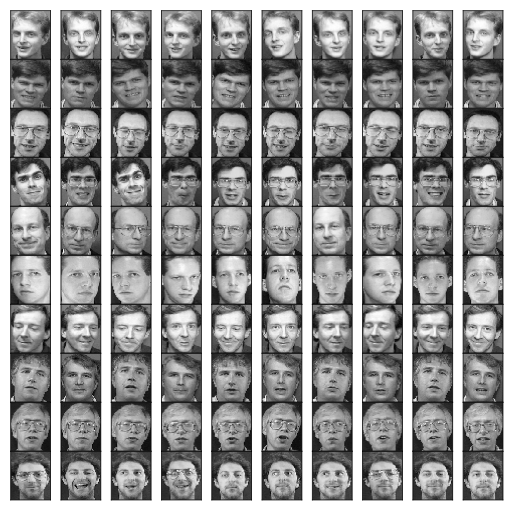

In [6]:
from glob import iglob
faces = pd.DataFrame([])
for path in iglob('data/*/*.pgm'):
    img=imread(path)
    face = pd.Series(img.flatten(),name=path)
    faces = faces.append(face)
 
fig, axes = plt.subplots(10,10,figsize=(9,9),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.iloc[i].values.reshape(112,92),cmap="gray")

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2920: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2923: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2917: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2921: RuntimeWarning:

invalid value encountered in double_scalars



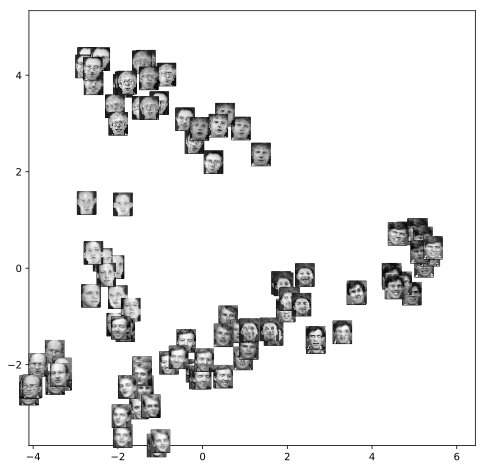

In [7]:
# Now we load the top 99 images and perform kernel PCA. This gives us Y 
# the 2 dimensional projection and Gamma the top two eigen values returned 
# by kernel PCA (of the centered kernel matrix on data)
# To give you a visualization, we scatter plot the images in the 2 dimensional 
# plane based on Y returned by kernel PCA.

X = faces.values;

X = X[0:99,:];



# Run Kernel PCA
Kern = kernel(X,X)

Y, Gamma = KPCA(Kern,2)

YY = Y;


#Plot the faces in a 2d scatter plot


fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)



for t in range(99):
    I = faces.iloc[t].values.reshape(112,92)
    imagebox = OffsetImage(255*I, zoom=0.2,cmap="gray")
    xy = Y[t,:]
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-0, -0.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.0,
                        arrowprops=dict(arrowstyle="->",
                                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
    ax.add_artist(ab)

mn = YY.min(0)
mx = YY.max(0)
ax.set_xlim(mn[0],mx[0]+1)
ax.set_ylim(mn[1],mx[1]+1)

plt.draw()
plt.show()

# Time for a simple check to see if your code is working

One simple way to do a preliminary sanity check is to take a point already in the dataset, project it to 2 dimensions and check if the projected location coincides with the low dimenional representation originally computed in Y. We perform this check on a randomly selected point amongst the $n$ points below. See if your code passes the test.

In [8]:
r = np.random.randint(99)

Kcenter = Q1_1_solution(X[r,:],X,Kern)
y = Q1_2_solution(Kcenter,Y,Gamma)



if(np.linalg.norm(y-Y[r,:]) < 0.00000001):
    print('You seem to pass the basic test that on one of the n points, the newly computed point has same y as from KPCA')
else:
    print('You currently fail this test! When you re project previously seen point, it is not coinciding with location in Y')

You seem to pass the basic test that on one of the n points, the newly computed point has same y as from KPCA


# Now for projecting a new point

Now we are going to project a new point, the 100th point, into the 2 dimenional space. The new point along with the previous 99 points are scatter plotted with the 100th image shown in larger size. See if the point seems to be intuitively placed in the right position (if faces of the same person are close to this new image of the person).

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2920: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2923: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2917: RuntimeWarning:

divide by zero encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/patches.py:2921: RuntimeWarning:

invalid value encountered in double_scalars

/usr/local/lib/python3.6/site-packages/matplotlib/text.py:1740: ComplexWarning:

Casting complex values to real discards the imaginary part

/usr/local/lib/python3.6/site-packages/matplotlib/text.py:1742: ComplexWarning:

Casting complex values to real discards the imaginary part



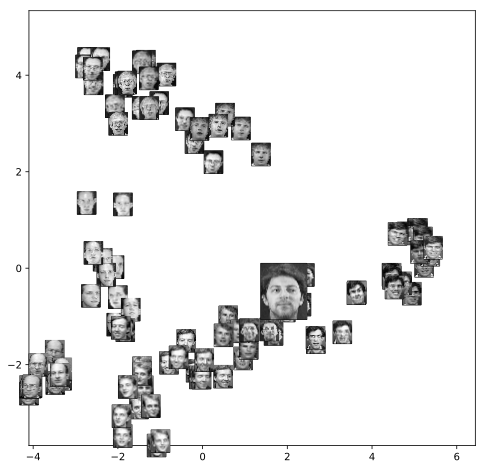

In [9]:
X = faces.values;
x = X[99,:]
X = X[0:99,:];
Kcenter = Q1_1_solution(x,X,Kern)
y = Q1_2_solution(Kcenter,Y,Gamma)

#Plot the faces in a 2d scatter plot


fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(8)



for t in range(99):
    I = faces.iloc[t].values.reshape(112,92)
    imagebox = OffsetImage(255*I, zoom=0.2,cmap="gray")
    xy = Y[t,:]
    ab = AnnotationBbox(imagebox, xy,
                        xybox=(-0, -0.),
                        xycoords='data',
                        boxcoords="offset points",
                        pad=0.0,
                        arrowprops=dict(arrowstyle="->",
                                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                        )
    ax.add_artist(ab)

I = faces.iloc[99].values.reshape(112,92)
imagebox = OffsetImage(255*I, zoom=0.5,cmap="gray")
xy = y[0,:]
ab = AnnotationBbox(imagebox, xy,
                    xybox=(-0, -0.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.0,
                    arrowprops=dict(arrowstyle="->",
                                    connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )
ax.add_artist(ab)

mn = YY.min(0)
mx = YY.max(0)
ax.set_xlim(mn[0],mx[0]+1)
ax.set_ylim(mn[1],mx[1]+1)

plt.draw()
plt.show()

# Question 2: Stability of Normalized Spectral Embedding

To understand a method well, you need to know when it breaks. 
Your goal in this question is to figure out the kind of graphs, such that if we edit the graphs just a little bit, normalized spectral embedding provides a vastly different answer. That is, we are interested in figuring out for what kind of graphs, normalized spectral embedding can be unstable. 

Specifically, you are asked in this question to first create a CONNECTED graph with $30$ vertices, such that when we you perform spectral embedding into $1$ dimension, the first $15$ vertices are say on the left (or right) and the next $15$ vertices  are on the right (or left). You will represent this graph in the form of an adjacency matrix that you will return in the variable $A$. (To help you visualize this we have provided scatter plot where first 15 points are colored blue and next 15 in red).

Next, you are allowed to add (only add not delete) at most 2 more edges to the graph. Represent this new graphs adjacency matrix in variable $AA$. Now when we redo spectral embedding on this new graph that is different from matrix $A$ by only $2$ additional edges, the first $15$ and the last $15$ points should be intermingled. 


# Hint:

Biggest hint for this problem is to use pen and paper top come up with the graph. Also, think about what normalized spectral embedding is optimizing for.


In [10]:
import numpy as np
from scipy.sparse.linalg import eigs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
init_notebook_mode(connected=True)
import pandas as pd
import scipy.linalg as lin
import copy

# Word of caution

Within a function if you write 

AA = A

and then edit $AA$ it might also change $A$. To avoid this, I have imported copy. So instead of saying AA = A instead use

AA = copy.deepcopy(A)

# Your Solution:
Put your solution below:

In [11]:
# Your solution goes below here: write your solution in the function below. 
#It must return two 30 x 30 adjacency matrices, one in A that has the original graph
# and two in AA that is the adjacency matrix with at most 2 edges added to graph in A

#<GRADED>

def Q2_solution():
    A = np.zeros((30,30))
    AA = copy.deepcopy(A)
    A[0,1] =1
    A[1,0] = 1
    for i in range(1,29):
        AA[i-1,i]=1
        AA[i+1,i]=1
    AA[1,0]=1
    AA[29,0]=1
    AA[0,29]=1
    AA[28,29]=1
    A=copy.deepcopy(AA)
    A[29,0]=0
    A[0, 29]=0
    return A, AA

#</GRADED>

In [12]:
# Now we perform some basic checks on your solution

A, AA = Q2_solution()  # now lets get your solution in A and AA


# Now lets check if you are returning valid graphs

if(np.linalg.norm(A != A.T)>0):
    print('Adjacency matrix A is not a valid one, not symmetric')
else:
    print('Adjacency matrixz A is symmetric, good job!')

if(np.linalg.norm(AA != AA.T)>0):
    print('Adjacency matrix A is not a valid one, not symmetric')
else:
    print('Adjacency matrixz A is symmetric, good job!')

# Now lets check if graph in AA only has at most 2 additional edges compared to graph in A

if(((sum(sum(AA - A))) <0) or (sum(sum(AA - A)) > 4) or (sum(sum(abs(AA - A))) > 4) ):
    print('AA seems to be either have edge deleted from A or has more than 2 edges added to it')
else:
    print('Your adjacency matrices A and AA pass the check')

Adjacency matrixz A is symmetric, good job!
Adjacency matrixz A is symmetric, good job!
Your adjacency matrices A and AA pass the check


In [13]:

# Now lets perform spectral embedding on graph in A

D = np.diag(sum(A,0))
L = D - A
Dh = lin.sqrtm(D)
Dh = lin.inv(Dh)
Lt = Dh@L@Dh

E, V = eigs(Lt,2,which='SR')
E = np.real(E)
V = np.real(V)

Y = Dh@V[:,1:2]

# Y has the one dimensional projection of graph in A

In [14]:
# Now lets perform scatter plot to visualize, if your solution is right, red points should be one one side and blue on the other.

scatter = go.Scatter(
    x = Y[0:15,0],
    y = np.zeros((15)),
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='blue',
        opacity=1
    )
)

scatter1 = go.Scatter(
    x = Y[15:30,0],
    y = np.zeros((15)),
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='red',
        opacity=1
    )
)




data = [scatter,scatter1]
iplot(data, filename='fig0')

In [15]:
# Now lets perform spectral embedding on graph in AA 


D = np.diag(sum(AA,0))
L = D - AA
Dh = lin.sqrtm(D)
Dh = lin.inv(Dh)
Lt = Dh@L@Dh

E, V = eigs(Lt,3,which='SR')
E = np.real(E)
V = np.real(V)

Y = Dh@V[:,1:3]


In [16]:
# Lets do the scatter plot again and this time if your solution worked, the red and blue points must be mixed up

scatter = go.Scatter(
    x = Y[0:15,0],
    y = np.zeros((15)),
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='blue',
        opacity=1
    )
)

scatter1 = go.Scatter(
    x = Y[15:30,0],
    y = np.zeros((15)),
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='red',
        opacity=1
    )
)




data = [scatter,scatter1]
iplot(data, filename='fig0')

# Question 3: Stability of Single Link Clustering

In this question your goal is to understand what would break single link clustering algorithm. To understand this, we will test its stability. Thats is, we would like to see for what kind of examples is it true that if we change or specifically add just one extra point into our data set, the clusters given by single link changes drastically. 


Your goal in this question is to produce a data set with $31$ points in $2$ dimensions such that if we perform single link clustering to obtain $K=2$ clusters, on just the first $30$ points, we get a clustering such that first $15$ points belong to cluster one and next $15$ points belong to cluster two (i.e. half the points are in one cluster and other half in the other cluster). 

On the other hand, once we add the last point and perform spectral clustering on all the $31$ points, then the clustering changes drastically and we get one cluster to contain $30$ points and the second cluster to have just one point!

An additional requirement you need to adhere to while adding the last point is that the $31$'st point is well within the bounding box containing the first 30 points. (Take care to ensure that the $31$'st point is not at the boundary even but well within the smallest bounding box containing the first $30$ points)

In [17]:
import numpy as np
import math
from scipy.sparse.linalg import eigs
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
from IPython.display import display
init_notebook_mode(connected=True)
import pandas as pd
import copy

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt


# Your Solution goes here:


# Q 3 Solution 

Write your code below to generate n x d (31 x 2) dataset X that satisfies the requirements of the question.


In [18]:
# Your code for Q 2 goes below
#<GRADED>

def Q3_solution():
    X = np.zeros((31,2))  
    t = np.linspace(1, 15, 15)
    X[0:15,0] = t
    X[0:15,1]= t
    X[15:30,0] = t
    X[15:30,1]= -t
    X[30,0]=7
    X[30,1]=0
    return X

#</GRADED>

# Lets now first check that the 31'st point is well within bounding box.

In [19]:
X = Q3_solution()
Xfirst = X[0:30,:]
xmin  = Xfirst.min(0)
xmax = Xfirst.max(0)


if(xmin[0] + 0.1* (xmax[0] - xmin[0])< X[30,0]):
    if(xmin[1] + 0.1* (xmax[1] - xmin[1])< X[30,1]):
        if(xmax[0] - 0.1* (xmax[0] - xmin[0])> X[30,0]):
            if(xmax[1] - 0.1* (xmax[1] - xmin[1])> X[30,1]):
                print('You have passed this check, your last point is well within the bounding box')
            else:
                print('Your last point is not well within the bounding box')
        else:
            print('Your last point is not well within the bounding box')
    else:
        print('Your last point is not well within the bounding box')
else:
    print('Your last point is not well within the bounding box')


You have passed this check, your last point is well within the bounding box


# We shall now check by plotting.


In [20]:
# Below we provide you scatter plot of the first 30 points along with color coding the two clusters
# This visualization helps you form better intuition
# For this part, half the points must be blue and half red.


Z = linkage(X[0:30,:], 'single')
from scipy.cluster.hierarchy import fcluster
max_d = 2
clusters = fcluster(Z, max_d,criterion='maxclust')


A = np.where(clusters==2)
B = np.where(clusters==1)



scatter = go.Scatter(
    x = X[A[0],0],
    y = X[A[0],1],
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='blue',
        opacity=1
    )
)

scatter1 = go.Scatter(
    x = X[B[0],0],
    y = X[B[0],1],
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='red',
        opacity=1
    )
)




data = [scatter,scatter1]
iplot(data, filename='fig0')

In [21]:
# Below we check if half the points are red and half blue

if(abs(A[0].shape[0] - B[0].shape[0])!=0):
    print('You are not getting two equal sized clusrters on the first 30 points')
else:
    print('You passed this check')   


You passed this check


In [22]:
# Below we provide you scatter plot of all the 31 points along with color coding the two clusters
# This visualization helps you form better intuition
# If you have gotten it right, only one (or maybe a couple is fine) of points 
# must be of one color and the rest should be of the other color.


Z = linkage(X, 'single')
from scipy.cluster.hierarchy import fcluster
max_d = 2
clusters = fcluster(Z, max_d,criterion='maxclust')


A = np.where(clusters==2)
B = np.where(clusters==1)



scatter = go.Scatter(
    x = X[A[0],0],
    y = X[A[0],1],
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='blue',
        opacity=1
    )
)

scatter1 = go.Scatter(
    x = X[B[0],0],
    y = X[B[0],1],
    mode='markers',
    marker=dict(
        size=5,
        symbol='circle',
        color='red',
        opacity=1
    )
)




data = [scatter,scatter1]
iplot(data, filename='fig0')

In [23]:
# Below we check if cluster has changed significantly. (If you didnt pass the previous check, there is no point passing this one)

if(abs(A[0].shape[0] - B[0].shape[0]) < 20):
    print('Your clustering after adding the 31st point is not significanlty different')
else:
    print('You passed this check')

You passed this check
